# Singular Value Decomposition in Image Processing

Black and white image data can be expressed as a 2D tensor (matrix), where each pixel's intensity corresponds to a matrix entry. In this project, we will perform Singular Value Decomposition (SVD) on the image data to observe how the image changes with respect to the singular values.


In [ ]:
import numpy as np
from scipy.linalg import svd
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving image.jpg to image.jpg


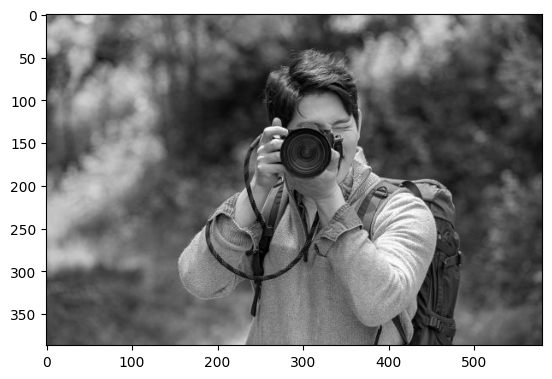

In [ ]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('/content/image.jpg',0)

scalingFactor = 1/255.0

img = np.float32(img)
img = img*scalingFactor

plt.imshow(img, cmap = 'gray')
plt.show()

In [ ]:
U, s, VT = svd(img)

print(s.shape)

(387,)


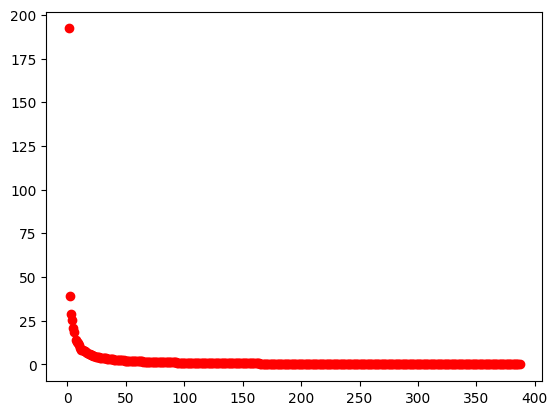

In [ ]:
k = np.arange(1,s.shape[0]+1)

plt.plot(k,s,'or')
plt.show()

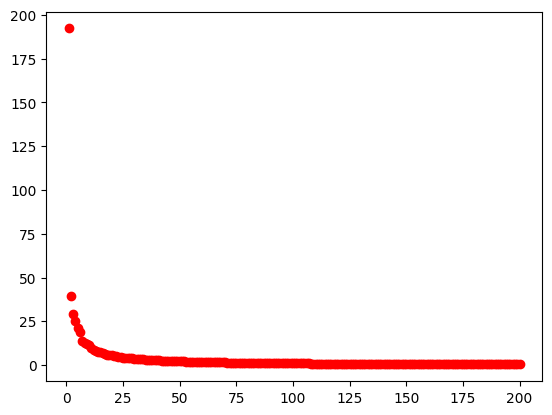

In [ ]:
small_value_point = 200

k = np.arange(1,small_value_point+1)
plt.plot(k,s[:small_value_point],'or')
plt.show()

We can observe that singular value goes zero as k increases. Also, when k is about 20, the singular value is almost zero. Let's check the chages of the image as k increases.

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

gen_image = np.zeros_like(img,dtype=np.float32)
stop_k = 20

fig = go.Figure()

for i in range(stop_k):
  gen_image += s[i] * np.dot(U[:, i].reshape(img.shape[0], 1), VT[i].reshape(1, img.shape[1]))
  fig.add_trace(go.Heatmap(z=gen_image, colorscale='gray'))

fig.update_yaxes(autorange='reversed', scaleanchor='x', constrain='domain')
fig.update_xaxes(constrain='domain')

steps = []
for i in range(len(fig.data)):
  step = dict(
    method="update",
    args=[{"visible": [False] * len(fig.data)},
          {"title": "Slider switched to step: " + str(i)}],
  )
  step["args"][0]["visible"][i] = True
  steps.append(step)

fig.update_layout(
  sliders = [dict(
    active=10,
    currentvalue={"prefix": "k: "},
    pad={"t": 50},
    steps=steps
  )])

fig.show()

We can observe the image becoming clearer as each step is processed.
Using this method, let's separate the noise from the image in the noisy image.

In [ ]:
uploaded = files.upload()

Saving noised_image.jpg to noised_image (1).jpg


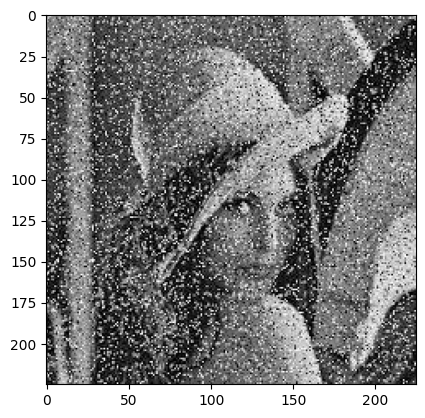

In [ ]:
img = cv2.imread('/content/noised_image.jpg',0)

scalingFactor = 1/255.0

img = np.float32(img)
img = img*scalingFactor

plt.imshow(img, cmap = 'gray')
plt.show()

In [ ]:
U, s, VT = svd(img)

print(s.shape)

(225,)


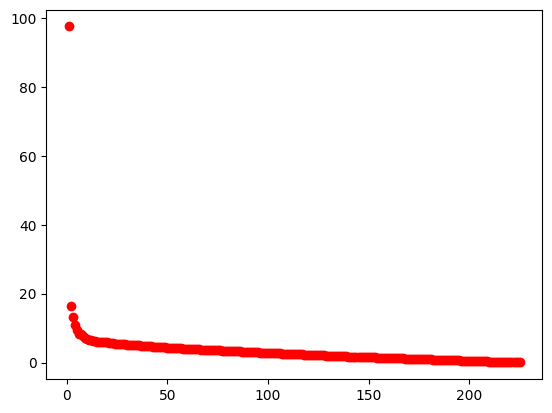

In [ ]:
k = np.arange(1,s.shape[0]+1)

plt.plot(k,s,'or')
plt.show()

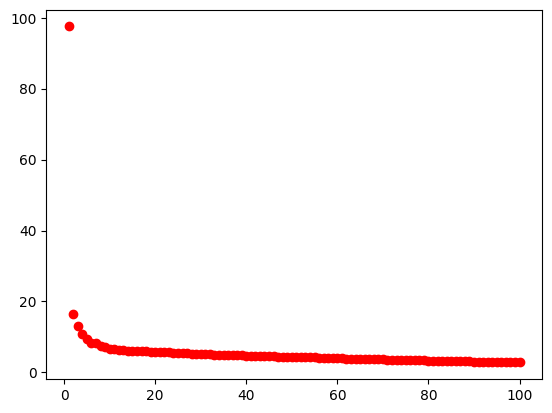

In [ ]:
small_value_point = 100

k = np.arange(1,small_value_point+1)
plt.plot(k,s[:small_value_point],'or')
plt.show()

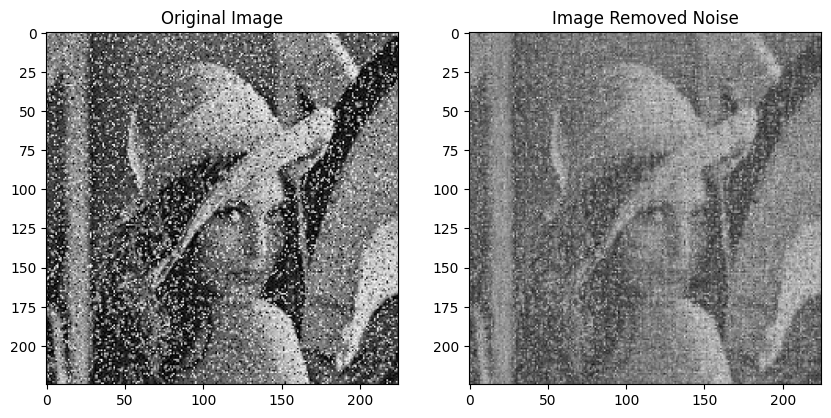

In [ ]:
gen_image = np.zeros_like(img,dtype=np.float32)
stop_k = 50

for i in range(stop_k):
  gen_image += s[i] * np.dot(U[:, i].reshape(img.shape[0], 1), VT[i].reshape(1, img.shape[1]))

fig = plt.figure(figsize=(10, 10))
rows = 1
cols = 2
ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(img, cmap = 'gray')
ax1.set_title('Original Image')
ax2 = fig.add_subplot(rows, cols, 2)
plt.imshow(gen_image, cmap = 'gray')
ax2.set_title('Image Removed Noise')
plt.show()

In [ ]:
noise = np.zeros_like(img,dtype=np.float32)

for i in range(stop_k+1, s.shape[0]):
  noise += s[i] * np.dot(U[:, i].reshape(img.shape[0], 1), VT[i].reshape(1, img.shape[1]))

px.imshow(noise, binary_string=True)

Although the photo has become slightly blurred, we can see that the noise has been reduced compared to the original image, and the extracted noise exhibits the characteristics of Gaussian noise.